## Question 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls
from scipy.optimize import line_search
from mpl_toolkits import mplot3d

In [2]:
def squared_norm(x):
    x_val = np.float64(x[0][0])
    y_val = np.float64(x[1][0])
    return x_val*x_val + y_val*y_val

def norm(x):
    return np.sqrt(squared_norm(x))

def get_unit_vector(x):
    norm_value = norm(x)
    if norm_value == np.float64(0.0):
        return x
    return (x/norm_value).copy()

In [8]:
def f1(x,y):
    vec = np.array([[x],[y]])
    A = np.array([[1,0],[0,1]])
    h = np.matmul(vec.T,A)
    return 0.5*np.matmul(h,vec)

def f2(x,y):
    vec = np.array([[x],[y]])
    A = np.array([[10,8],[8,10]])
    h = np.matmul(vec.T,A)
    return 0.5*np.matmul(h,vec)
    
def gradient_f1(x):
    x_value = np.float64(x[0][0])
    y_value = np.float64(x[1][0])
    return np.array([[x_value],[y_value]])

def gradient_f2(x):
    x_value = np.float64(x[0][0])
    y_value = np.float64(x[1][0])
    return np.array([[10*x_value + 8 *y_value],[10*y_value + 8 * x_value]])

def hessian_f1(x):
    return np.array([[1,0],[0,1]])

def hessian_f2(x):
    return np.array([[10,8],[8,10]])

In [ ]:
def steepest_descent(initial_point,function='f1'):

    #initial_point = np.array([[2.0],[0.0]],dtype=np.float64)
    fun = f1 if function == 'f1' else f2
    gradient_fun = gradient_f1 if function == 'f1' else gradient_f2

    current_point = initial_point.copy()
    
    c = 0.0001
    rho = 0.9
    iterations = 0
    iterates = []

    iterates.append(current_point)

    while True:        
        
        iterations += 1
        gradient = gradient_fun(current_point)
        p = -get_unit_vector(gradient)            
        alpha  = np.float64(1.0)
        previous_point = current_point.copy() 
        break_inner_loop = False
    
        current_x = np.float64(current_point[0][0])
        current_y = np.float64(current_point[1][0])

        current_function_value = np.float64(fun(current_x,current_y).squeeze()) 
        while not break_inner_loop:
            
            new_point = current_point + alpha*p

            new_x = np.float64(new_point[0][0])
            new_y = np.float64(new_point[1][0])

            new_function_value = np.float64(fun(new_x,new_y).squeeze())
            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())

            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
     

        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    return iterations,iterates


In [ ]:
initial_point = np.array([[2.0],[2.0]],dtype=np.float64)
iterations , iterates = steepest_descent(initial_point=initial_point,function='f2')

In [ ]:
def newtons_method(initial_point,function = 'f1'):

    fun = f1 if function == 'f1' else f2
    gradient_fun = gradient_f1 if function == 'f1' else gradient_f2
    hessian_fun = hessian_f1 if function =='f1' else hessian_f2
    current_point = initial_point.copy()
    
    iterations = 0
    iterates = []
    iterates.append(current_point)
    c = 0.0001
    rho = 0.9

    while True:        
        iterations+=1
        gradient = gradient_fun(current_point)
        hessian = hessian_fun(current_point)
        m = np.matmul(np.linalg.inv(hessian),gradient)
        p = -m
        
        break_inner_loop = False
        alpha  = np.float64(1.0)
 
        current_x = np.float64(current_point[0][0])
        current_y = np.float64(current_point[1][0])

        current_function_value = np.float64(fun(current_x,current_y).squeeze()) 
        
        while not break_inner_loop:
            new_point = current_point + alpha*p
            new_x = np.float64(new_point[0][0])
            new_y = np.float64(new_point[1][0])

            new_function_value = np.float64(fun(new_x,new_y).squeeze())

            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())
            second_order_term = (c*(alpha*alpha/2)*(np.matmul(np.matmul(p.T,hessian),p))).squeeze()
            increment_value += np.float64(second_order_term)
            
            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
      
        
        previous_point = current_point.copy() 
        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    
    return iterations,iterates

In [ ]:
initial_point = np.array([[2.0],[0.0]],dtype=np.float64)
iterations , iterates = newtons_method(initial_point=initial_point,function='f2')

In [ ]:
def plot(function,iterations,iterates):
    
    if function == 'f1':
        fun = f1
    else:
        fun = f2

    res = 1000
    x_values = np.linspace(2.1,-2.1,res)
    y_values = np.linspace(2.1,-2.1,res)
    
    X,Y = np.meshgrid(x_values,y_values)

    Z = np.zeros((res,res))
    for i in range(len(X[0])):
        for j in range(len(Y[:,0])):
            z_value = fun(X[0,i],Y[j,0])
            Z[i][j] = z_value
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) 
    ax.set_title('Contour Plot')
    plt.plot(iterates[0][0,0],iterates[0][1,0],'ro')
    for i in range(1,len(iterates)):
        plt.arrow(iterates[i-1][0,0],iterates[i-1][1,0],dx = iterates[i][0,0] - iterates[i-1][0,0] ,dy = iterates[i][1,0] - iterates[i-1][1,0],width=0.01,head_width = 0.09)
    plt.plot(iterates[len(iterates)-1][0,0], iterates[len(iterates)-1][1,0],'go',linewidth=0.1)
    plt.show()
            
    

print(iterates)
    
plot(function='f2',iterates= iterates, iterations =iterations)

In [ ]:
initial_point = np.array([[150.0],[20.0]],dtype=np.float64)
newtons_method(initial_point,function='f2')

In [ ]:
min

### Question 3

In [4]:
from scipy.optimize import rosen,rosen_der
from scipy.optimize import line_search
from scipy.optimize import minimize

In [5]:

def rosenbrock(point):
    a = 1.0
    b = 100.0
    x = point[0]
    y = point[1]
    result = (1-x)**2
    result += b*((y - x**2)**2)
    return result

def rosenbrock_jacobian(point):
    a = 1.0
    b = 100.0
    x = point[0]
    y = point[1]
    result = np.zeros((2,))
    result[0] = -2.0*(a-x) - 4*b*x*(y - x**2)
    result[1] = 2.0*b*(y - x**2)
    return result

def rosenbrock_hessian(point):
    a = 1.0
    b = 100.0
    x = point[0]
    y = point[1]
    hessian = np.zeros((2,2))
    hessian[0][0] = 2+12*b*x*x - 4*b*y
    hessian[0][1] = -4*b*x
    hessian[1][0] = -4*b*x
    hessian[1][1] = 2*b 
    return hessian


In [22]:
def steepest_descent_rosenbrock(point):

    fun = rosenbrock
    gradient_fun = rosenbrock_jacobian
    
    current_point = point.copy()
    c = 0.0001
    rho = 0.9
    iterations = 0
    
    step_sizes = []
    iterates = []
    function_values = []
    
    iterates.append(current_point)
    function_values.append(np.float64(fun(current_point.squeeze()).squeeze()))

    while True:        
        iterations += 1
        gradient = gradient_fun(current_point)
        gradient = np.expand_dims(gradient,axis=1)
        p = -get_unit_vector(gradient)            
        alpha  = np.float64(1.0)
        previous_point = current_point.copy() 
        break_inner_loop = False
    
        current_function_value = np.float64(fun(current_point.squeeze()).squeeze()) 
        while not break_inner_loop:
            
            new_point = current_point + alpha*p

            new_function_value = np.float64(fun(new_point.squeeze()).squeeze())
            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())

            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True
     
        step_sizes.append(alpha)
        new_point = current_point + alpha*p
        current_point = new_point.copy()
        iterates.append(current_point)
        function_values.append(np.float64(fun(new_point.squeeze()).squeeze()))

        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    return iterations,iterates, function_values, step_sizes
    
iterations, iterates, function_values , step_sizes = steepest_descent_rosenbrock(np.array([[-1.2],[0.0]]))

In [9]:
iterates

[array([[-1.2],
        [ 0. ]]),
 array([[-0.27606086],
        [ 0.38253949]]),
 array([[-0.4935209 ],
        [-0.04346409]]),
 array([[-0.14889594],
        [ 0.28820074]]),
 array([[-0.26690793],
        [-0.1753088 ]]),
 array([[-0.02533279],
        [ 0.23749791]]),
 array([[-0.02850797],
        [-0.19295759]]),
 array([[0.01388879],
        [0.1921361 ]]),
 array([[ 0.04140159],
        [-0.15545518]]),
 array([[0.03524278],
        [0.12690719]]),
 array([[ 0.06857118],
        [-0.09941996]]),
 array([[0.05876403],
        [0.10623747]]),
 array([[ 0.10090487],
        [-0.09529493]]),
 array([[0.07706584],
        [0.10921144]]),
 array([[ 0.12577715],
        [-0.09083447]]),
 array([[0.0947948 ],
        [0.09185908]]),
 array([[ 0.13776814],
        [-0.05195222]]),
 array([[0.11721011],
        [0.08155947]]),
 array([[ 0.16348079],
        [-0.045354  ]]),
 array([[0.13560361],
        [0.0868234 ]]),
 array([[ 0.18550409],
        [-0.03870726]]),
 array([[0.15155924]

In [51]:
def newton_rosenbrock(point):

    fun = rosenbrock
    gradient_fun = rosenbrock_jacobian
    hessian_fun = rosenbrock_hessian
    current_point = point.copy()
    
    iterations = 0
    function_values = []
    iterates = []
    step_sizes = []

    iterates.append(current_point)
    function_values.append(np.float64(fun(current_point.squeeze()).squeeze()))

    
    c = 0.0001
    rho = 0.9

    while True:        
        iterations+=1
        gradient = np.expand_dims(gradient_fun(current_point.squeeze()),axis=1)
        hessian = hessian_fun(current_point.squeeze())


        m = np.matmul(np.linalg.inv(hessian),gradient)
        p = -m
        
        break_inner_loop = False
        alpha  = np.float64(1.0)
 
        current_function_value = np.float64(fun(current_point.squeeze()).squeeze()) 
        while not break_inner_loop:

            new_point = current_point + alpha*p
            new_function_value = np.float64(fun(new_point.squeeze()).squeeze())
            increment_value = np.float64(((c*alpha)*np.dot(gradient.T,p)).squeeze())
            second_order_term = (c*(alpha*alpha/2)*(np.matmul(np.matmul(p.T,hessian),p))).squeeze()
            increment_value += np.float64(second_order_term)
            

            if((new_function_value > (current_function_value + increment_value))):
                alpha = alpha * rho
            else:
                break_inner_loop = True

        
        previous_point = current_point.copy() 
        new_point = current_point + alpha*p
        current_point = new_point.copy()
        
        step_sizes.append(alpha)
        function_values.append(np.float64(fun(new_point.squeeze()).squeeze()))
        iterates.append(current_point)
        
        if np.linalg.norm(current_point-previous_point) < 0.00001:
            break
    
    return iterations,iterates,function_values,step_sizes

iterations, iterates, function_values , step_sizes= newton_rosenbrock(np.array([[-1.2],[0.0]]))

In [52]:
print(iterates)

[array([[-1.2],
       [ 0. ]]), array([[-1.19238754],
       [ 1.4217301 ]]), array([[-0.86709208],
       [ 0.64598228]]), array([[-0.78288747],
       [ 0.60582238]]), array([[-0.49723676],
       [ 0.16130462]]), array([[-0.41491652],
       [ 0.1653791 ]]), array([[-0.15632148],
       [-0.0462945 ]]), array([[-0.07997738],
       [ 0.00056796]]), array([[ 0.15853838],
       [-0.03479606]]), array([[0.2233355 ],
       [0.04568008]]), array([[0.44768939],
       [0.1481238 ]]), array([[0.49588236],
       [0.24357675]]), array([[0.67881612],
       [0.42623831]]), array([[0.71941781],
       [0.51591349]]), array([[0.87324537],
       [0.73844782]]), array([[0.89501729],
       [0.80058193]]), array([[0.99090914],
       [0.97270567]]), array([[0.99411122],
       [0.98824686]]), array([[0.99998795],
       [0.99994136]]), array([[0.99999992],
       [0.99999983]]), array([[1.],
       [1.]])]


In [11]:
minimize(rosenbrock,np.array([1.2,1.2]),method='Newton-CG',jac=rosenbrock_jacobian,hess=rosenbrock_hessian)

     fun: 2.9339098459633996e-16
     jac: array([ 4.62401128e-06, -2.32450401e-06])
 message: 'Optimization terminated successfully.'
    nfev: 16
    nhev: 12
     nit: 12
    njev: 16
  status: 0
 success: True
       x: array([0.99999998, 0.99999997])

In [28]:
def steepest_descent_rosenbrock_scipy(point):

    current_point = point.copy()
    previous_point = point.copy()

    iterations =0
    iterates = []

    while True:
        iterations+=1
        iterates.append(current_point)
      
        previous_point = current_point.copy()
        current_gradient = np.expand_dims(rosenbrock_jacobian(current_point.squeeze()),1)
        step_length = line_search(rosenbrock,rosenbrock_jacobian,current_point.squeeze(),-get_unit_vector(current_gradient).squeeze())
        print(step_length[0])
        if step_length[0] == None:
            break
        
        current_point += step_length[0]*(-get_unit_vector(current_gradient))

    return iterations,iterates



In [29]:
minimize(rosenbrock,np.array([1.2,1.2]),method='Newton-CG',jac=rosenbrock_jacobian,hess=rosenbrock_hessian)

     fun: 0.0058916699130939585
     jac: array([0.14211256, 0.00536198])
 message: 'Warning: Maximum number of iterations has been exceeded.'
    nfev: 407
    nhev: 400
     nit: 400
    njev: 407
  status: 1
 success: False
       x: array([1.07667133, 1.15958416])

/var/folders/sm/_xvm618541nc11hb7mv_kpj40000gn/T/ipykernel_15098/2950210405.py:15: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(cp)


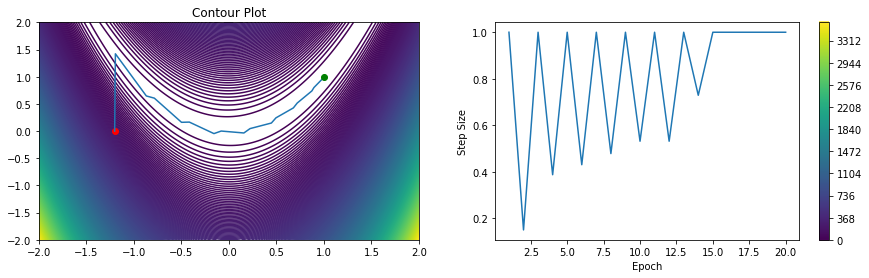

In [53]:
def plot_steplength_iterates(step_sizes,iterates,lower_limit,upper_limit):
  
    res = 1000
    x_values = np.linspace(lower_limit,upper_limit,res)
    y_values = np.linspace(lower_limit,upper_limit,res)
    
    X,Y = np.meshgrid(x_values,y_values)
    
    plot_fn = lambda x,y : rosenbrock(np.array([x,y]))
    Z = plot_fn(X,Y)    

    fig,ax=plt.subplots(1,2)
    fig.set_figwidth(15)
    cp = ax[0].contour(X, Y, Z,500)
    fig.colorbar(cp) 
    ax[0].set_title('Contour Plot')
    
    #iterates = np.array(iterates)
    ax[0].plot(iterates[0,0,0],iterates[0,1,0],'ro')
    #plt.plot(iterates[0:2,0,0], iterates[0:2,1,0])
    ax[0].plot(iterates[:,0,0],iterates[:,1,0])
    ax[0].plot(iterates[len(iterates)-1,0,0], iterates[len(iterates)-1,1,0],'go')
    
    ax[1].plot(np.arange(1,len(iterates))[:150],step_sizes[:150])
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Step Size')
    
    plt.show()


iterates_np = np.array(iterates)       
plot_steplength_iterates(step_sizes,iterates_np,-2.0,2.0)

2.4166091947189074


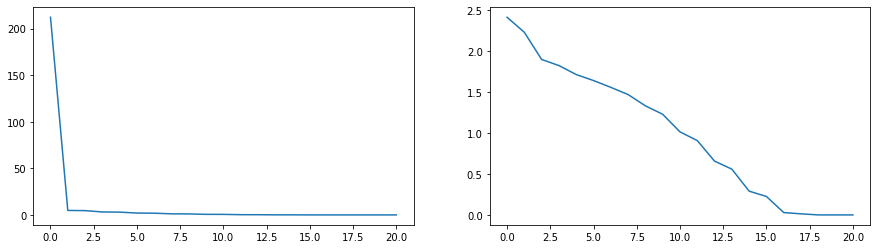

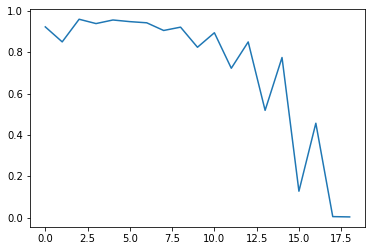

In [73]:
def plot_convergence(iterates, function_values):
    
    conv_values = []
    minima = iterates[-1]

    fig,ax=plt.subplots(1,2)
    fig.set_figwidth(15)
    
    
    ax[0].plot(np.arange(len(function_values)),function_values)
    
    
    
    new_iterates = iterates.copy()
    new_iterates_norm = [ 0 for i in range(len(new_iterates))]
    for i in range(len(iterates)-1):
        new_iterates[i] = iterates[i] - minima
        new_iterates_norm[i] = np.linalg.norm(new_iterates[i].squeeze())

    
    print(new_iterates_norm[0])
    ax[1].plot(np.arange(len(new_iterates_norm)),new_iterates_norm)

    plt.show()    

    for i in range(1,len(iterates)-1):

        n1 = np.linalg.norm(new_iterates[i])
        n2 = (np.linalg.norm(new_iterates[i-1]))

        convergence =  n1/n2
        #print(convergence)
        conv_values.append(convergence)
    
    '''for i in range(2,len(iterates)-1):
        n1 = np.linalg.norm(iterates[i+1] - iterates[i])
        n2 = np.linalg.norm(iterates[i] - iterates[i-1])
        n3 = np.linalg.norm(iterates[i-1]- iterates[i-2])

        q = np.log(n1/n2) / np.log(n2/n3)
        conv_values.append(q)'''
    
    plt.plot(np.arange(len(conv_values)),conv_values)
    plt.show()


iterates_np = np.array(iterates)
plot_convergence(iterates_np,function_values)


In [ ]:
def plot_values(function_values):
    time = [i for i in range(len(function_values))]
    plt.plot(time[:100],function_values[:100])
    plt.show()



plot_values(function_values)


### Seperator

In [1]:
import pandas as pd

dataframe = pd.read_csv('./data/state_wise_daily.csv')

In [2]:
summed_data = dataframe.sum(axis=1,numeric_only=True)

In [3]:
infected_indices = [3*i for i in range(int(len(summed_data)/3))]
indices = [ 3*i+1 for i in range(int(len(summed_data)/3)) ]
indices =  indices +  [ 3*i+2 for i in range(int(len(summed_data)/3)) ]
indices = sorted(indices)


In [4]:
recovered_deceased = summed_data[indices]

In [5]:
recovered_dup = recovered_deceased.groupby(recovered_deceased.index//3).transform('sum')
rec_indices = [ 3*i + 1 for i in range(int(len(recovered_dup)//2))]
recovered = recovered_dup[rec_indices]
recovered = recovered.reset_index(drop = True)


In [6]:
infected = summed_data[infected_indices]
infected = infected.reset_index(drop=True)

In [7]:
new_dataframe = pd.DataFrame({'infected' :  infected , 'recovered' : recovered})
time_series = new_dataframe.index.array

In [8]:
time_series_df = pd.DataFrame()
time_series_df.insert(0,"time",time_series)

time_series_df["S(t)"] = 0
time_series_df["I(t)"] = 0
time_series_df.insert(3,"R(t)",new_dataframe['recovered'].cumsum())


In [9]:
population = 130 * (10**7)
#time_series_df.loc[0,"I(t)"] =  new_dataframe.loc[0,'infected']
#time_series_df.loc[0,"S(t)"] =  population - new_dataframe.loc[0,'infected'] - new_dataframe.loc[0,'recovered']

time_series_df.loc[0,"S(t)"] = population - new_dataframe.loc[0,'infected']
time_series_df.loc[0,"I(t)"] = new_dataframe.loc[0,'infected'] - new_dataframe.loc[0,'recovered'] 

for i in range(1,len(new_dataframe)):
    
    time_series_df.loc[i,"S(t)"] = time_series_df.loc[i-1,"S(t)"] - new_dataframe.loc[i,'infected']
    time_series_df.loc[i,"I(t)"] = time_series_df.loc[i-1,"I(t)"] + (new_dataframe.loc[i,'infected'] - new_dataframe.loc[i,'recovered'])
    #time_series_df.loc[i,"I(t)"] = time_series_df.loc[i-1,"I(t)"] + new_dataframe.loc[i,'infected'] - new_dataframe.loc[i,'recovered']
    #time_series_df.loc[i,"S(t)"] = population - time_series_df.loc[i,"I(t)"] - time_series_df.loc[i,"R(t)"]
 

In [10]:
time_series_df

,time,S(t),I(t),R(t)
0,0,1299999838,140,22
1,1,1299999784,186,30
2,2,1299999754,214,32
3,3,1299999732,232,36
4,4,1299999658,306,36
...,...,...,...,...
592,592,1231539219,334694,68126087
593,593,1231510605,335320,68154075
594,594,1231482175,335550,68182275
595,595,1231456295,331196,68212509


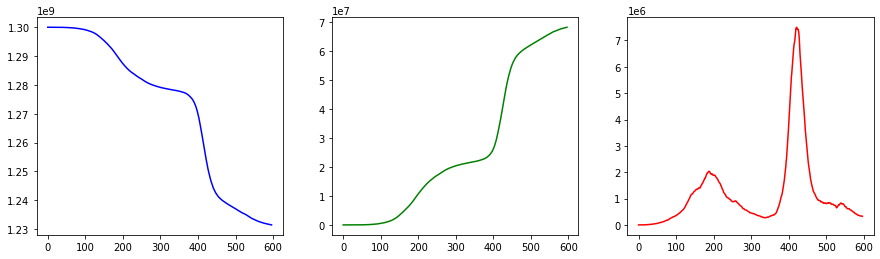

In [11]:

figure,axes = plt.subplots(1,3)
figure.set_figwidth(15)

axes[0].plot(time_series_df['time'],time_series_df['S(t)'] ,color='b', label = 'S(t)')
axes[1].plot(time_series_df['time'],time_series_df['R(t)'] ,color='g', label = 'R(t)')
axes[2].plot(time_series_df['time'],time_series_df['I(t)'] ,color='r', label = 'I(t)')
plt.show()

In [ ]:
new_dataframe

In [ ]:
time_series_df

In [12]:
for i in range(len(time_series_df)):
    print(time_series_df.loc[i,"I(t)"])

140
186
214
232
306
348
458
614
742
918
1034
1206
1312
1582
1840
2044
2294
2870
3668
4568
5584
6604
7692
8498
9439
10337
11731
13127
14382
15586
17794
19448
20878
22432
23654
25474
27782
29356
30918
32642
34612
36342
39040
40972
42832
45226
47114
49308
52022
55304
59106
64048
67144
71844
75374
79636
82928
87988
91852
94926
98178
102778
105718
107042
111760
115790
121742
126688
132176
138404
146296
153636
160140
164438
171686
179500
171768
179480
186758
194038
202156
213438
223804
232636
241992
252852
259040
267190
276236
285630
292940
300216
307662
305656
309368
321122
326612
337102
340374
351674
356412
365864
372574
380216
395472
406470
421660
430510
440880
454734
457874
473588
490910
506294
519718
531382
542504
554310
568216
582682
603498
623406
640112
662806
686648
719984
746554
780214
804028
825848
851040
879764
910986
935474
968906
991882
1018230
1055866
1089384
1129720
1135510
1158624
1171848
1170274
1190522
1212782
1233046
1257338
1270598
1280132
1288044
1304758
1321476
1336878


In [13]:
time_series_df.head()

,time,S(t),I(t),R(t)
0,0,1299999838,140,22
1,1,1299999784,186,30
2,2,1299999754,214,32
3,3,1299999732,232,36
4,4,1299999658,306,36


In [14]:
derivative_df = pd.DataFrame(0.0,index=np.arange(len(time_series_df)),columns=['ds/dt','di/dt','dr/dt'])

In [15]:
for i in range(len(time_series_df)):
    if i==0:
        derivative_df.loc[i,"ds/dt"] = (time_series_df.loc[i+1,"S(t)"] - time_series_df.loc[i,"S(t)"])
        derivative_df.loc[i,"di/dt"] = (time_series_df.loc[i+1,"I(t)"] - time_series_df.loc[i,"I(t)"])
        derivative_df.loc[i,"dr/dt"] = (time_series_df.loc[i+1,"R(t)"] - time_series_df.loc[i,"R(t)"])
    elif i == len(time_series_df)-1:
        derivative_df.loc[i,"ds/dt"] = (time_series_df.loc[i,"S(t)"] - time_series_df.loc[i-1,"S(t)"])
        derivative_df.loc[i,"di/dt"] = (time_series_df.loc[i,"I(t)"] - time_series_df.loc[i-1,"I(t)"])
        derivative_df.loc[i,"dr/dt"] = (time_series_df.loc[i,"R(t)"] - time_series_df.loc[i-1,"R(t)"])
    else:
        derivative_df.loc[i,"ds/dt"] = (time_series_df.loc[i+1,"S(t)"] - time_series_df.loc[i-1,"S(t)"])/2.0
        derivative_df.loc[i,"di/dt"] = (time_series_df.loc[i+1,"I(t)"] - time_series_df.loc[i-1,"I(t)"])/2.0
        derivative_df.loc[i,"dr/dt"] = (time_series_df.loc[i+1,"R(t)"] - time_series_df.loc[i-1,"R(t)"])/2.0


In [16]:
derivative_df.head()

,ds/dt,di/dt,dr/dt
0,-54.0,46.0,8.0
1,-42.0,37.0,5.0
2,-26.0,23.0,3.0
3,-48.0,46.0,2.0
4,-64.0,58.0,6.0


In [26]:
def cholesky(A):
    n = A.shape[0]
    ANS = np.zeros((A.shape[0],A.shape[1]))
    for j in range(n):
        s = 0.0
        for k in range(j):
            s += ANS[j][k] * ANS[j][k]
        
        ANS[j][j] = np.sqrt(A[j][j] - s)
        for i in range(j+1,n):
            s = 0.0
            for k in range(0,j):
                s += ANS[i][k] * ANS[j][k]
            ANS[i][j] = (1.0/ANS[j][j] * (A[i][j]-s))
    return ANS

def convert_to_symmetric(X):
    return 0.5*(X + X.T)

def back_substitution(A,b):
    solution = np.zeros(A.shape[0])
    for i in range(A.shape[0]- 1, -1,-1):
        tmp = b[i][0]

        for j in range(A.shape[0]-1,i,-1):
            tmp -= solution[j] * A[i,j]
        solution[i] = tmp / A[i,i]
    return solution

def forward_substitute(A,b):
    
    solution = np.zeros(A.shape[0])
    for i in range(A.shape[0]):        
        tmp = b[i][0]
        for j in range(i):
            tmp -= solution[j]*A[i,j]
        solution[i] = tmp / A[i,i]
    return solution

def oneday_solve(day_param,derivative):
    X = np.zeros((3,2))
    y = np.zeros((3,1))
    i_s_n = (day_param.loc['S(t)'] * day_param.loc['I(t)'])/ (population)
    X[0,0] = -i_s_n
    X[1,0] = i_s_n
    X[1,1] = -day_param.loc['I(t)']
    X[2,1] = day_param.loc['I(t)']

    y[0,0] = derivative.loc['ds/dt']
    y[1,0] = derivative.loc['di/dt']
    y[2,0] = derivative.loc['dr/dt']

    A = np.matmul(X.T,X)
    b  = np.matmul(X.T,y)

    #A_sym = convert_to_symmetric(A)
    A_tri = cholesky(A)
  
    inter = forward_substitute(A_tri,b)
    inter = np.expand_dims(inter,1)
    sol = back_substitution(A_tri.T,inter)

    solution = nnls(X,y.squeeze())
    
    return sol,solution[0]
    #
    #solution = np.linalg.solve(A,b)
    #print(solution)



In [27]:
indices = []
plot_points = []

for i in range(len(time_series_df)):

    sol,solution = oneday_solve(time_series_df.loc[i],derivative_df.loc[i])
    print(str(sol) == str(solution))
    plot_points.append(sol[0]/sol[1])
    indices.append(i+1)

Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exist
True
Inverse does not exi

In [19]:
plot_points

[6.750000841153954,
 8.40000139569254,
 8.66666830666698,
 24.000004947693387,
 10.666669472821251,
 9.444447321368402,
 45.3333511876995,
 48.33335816924353,
 9.94118260353319,
 8.300006422928039,
 15.40001343355015,
 9.687509791836828,
 5.5853720577179615,
 7.13954461546943,
 11.500018205413427,
 4.242864577661381,
 5.975915805326074,
 15.934822690903516,
 14.918080042772644,
 11.886410176231172,
 9.413268106953524,
 8.865721889974807,
 7.486350814330778,
 5.7732664727834475,
 5.2179328518442505,
 5.939709219198682,
 5.82704992934393,
 4.317947848524993,
 4.214433888817238,
 6.7831469646501175,
 6.629844232524349,
 5.112090322771244,
 4.279202318924396,
 3.3328419785775973,
 2.9702728443648896,
 3.327025243469061,
 3.210791629024369,
 2.298078805685933,
 2.3854025288487737,
 2.6610587206792875,
 2.5102930599356594,
 3.1517220396569883,
 3.054249495629022,
 2.4825146484176757,
 2.58388478395971,
 2.4605552725091586,
 2.392345432994401,
 2.4072392179064903,
 2.528177552415811,
 2.79449

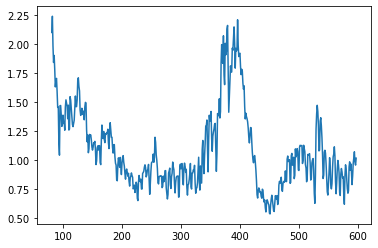

In [21]:
plt.plot(indices[80:],plot_points[80:])

In [ ]:
f = np.array([[1,-1,1],[0,2,-5],[0,0,3]])
b = np.array([[8],[-27],[15]])
back_substitution(f,b)

In [ ]:
f = np.array([[3,0,0],[-5,2,0],[1,-1,1]])
b = np.array([[15],[-27],[8]])
forward_substitute(f,b)

In [ ]:
import numpy as np


matrix = np.array([[4,12,-16],[12,37,-43],[-16,-43,98]])  

cholesky(matrix)
